In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

In [113]:
datadir = "/content/drive/MyDrive/faceid/train"

In [114]:
categories=['Dung','Long','Thien']

In [115]:
img_size=128

[[200 197 196 ... 156 185 196]
 [200 197 196 ... 167 185 190]
 [201 197 196 ... 187 187 187]
 ...
 [129 128 129 ... 157 197 203]
 [126 127 127 ... 185 201 204]
 [120 118 111 ... 196 203 205]]


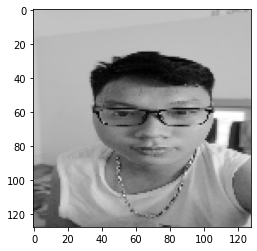

In [116]:
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [117]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 50/50 [00:01<00:00, 25.87it/s]

150


In [118]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)

In [119]:
print('x',x.shape)

x (150, 128, 128, 1)


In [120]:
print('y',y.shape)

y (150,)


In [121]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/faceid/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

In [122]:
pickle_out=open("/content/drive/MyDrive/faceid/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [123]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [124]:
pickle_in = open("/content/drive/MyDrive/faceid/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/faceid/Save/y.pickle","rb")
y= pickle.load(pickle_in)

In [125]:
X=X/255.0

In [126]:
y= to_categorical(y,3)

In [127]:
y.shape

(150, 3)

In [128]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [129]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [130]:
from tensorflow.keras.optimizers import SGD
opt =SGD()

In [131]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [132]:
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 463ms/step - loss: 29.1931 - accuracy: 0.4000 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 251ms/step - loss: 1.9873 - accuracy: 0.3250 - val_loss: 1.6949 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 247ms/step - loss: 0.9508 - accuracy: 0.5667 - val_loss: 1.7161 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 247ms/step - loss: 0.8245 - accuracy: 0.7667 - val_loss: 0.9546 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 247ms/step - loss: 0.7332 - accuracy: 0.7667 - val_loss: 1.1623 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 247ms/step - loss: 0.6968 - accuracy: 0.6500 - val_loss: 0.9439 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 248ms/step - loss: 1.2062 - accuracy: 0.5833 - val_loss: 0.9051 - val_accuracy:

In [133]:
model.save('FACEID.h5')

In [134]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [135]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(128, 128))	
	
	return img
labels = {0: 'Dung',1: 'Long',2: 'Thien'}

In [136]:
model = load_model('FACEID.h5')

[[0. 0. 1.]]
expectation Thien


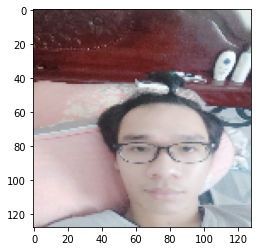

In [141]:
img = load_image('/content/drive/MyDrive/faceid/test/Thien/03.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0.]]
expectation Dung


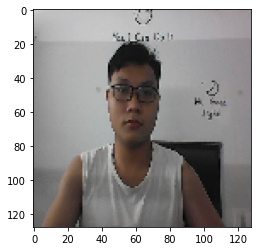

In [138]:
img = load_image('/content/drive/MyDrive/faceid/test/Dung/dung (2).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0.]]
expectation Long


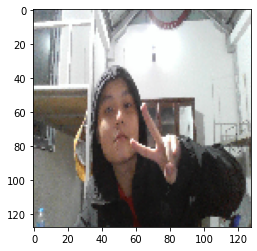

In [139]:
img = load_image('/content/drive/MyDrive/faceid/test/Long/1 (58).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])